In [1]:
# Import relevant Data Preprocessing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import statsmodels

In [2]:
# Import Data
data = pd.read_excel('1613615-Stock_Price_data_set (1).xlsx', index_col='Date')

## Preprocessing of Data

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   float64
dtypes: float64(6)
memory usage: 55.2 KB


We can check for number of entries and type of data from the above info.

It can be seen that our table is complete, we have no missing data and all the data types are Float which is 
ideal for our use.

In [6]:
data.index

DatetimeIndex(['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1009, freq=None)

Make sure to check the format of index and check if it has appropriate format for use in predictions.

Example: In weather data, if we need to predict for next few hours or days, we may need to change the format of data to hours or minutes.

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


The above table is useful to check for data values, any outliers or problems with data coressponding to
information represented by specific data.

For our data, we can see that our data is completely fine and we can proceed to use this data for predictions.

<AxesSubplot:>

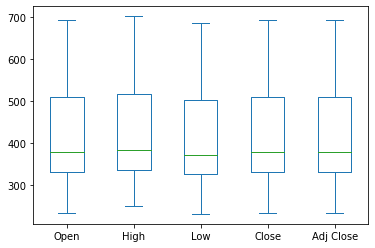

In [8]:
data.drop(['Volume'],axis=1).plot(kind='box')

Boxplots are useful for seeing outliers and different statistics of data and sometimes to compare them as well.

In this case, we drop volume because we have no use of that data and its values are too big compared to others.

In [9]:
# Changes in opening and Adj Closing prices over time 

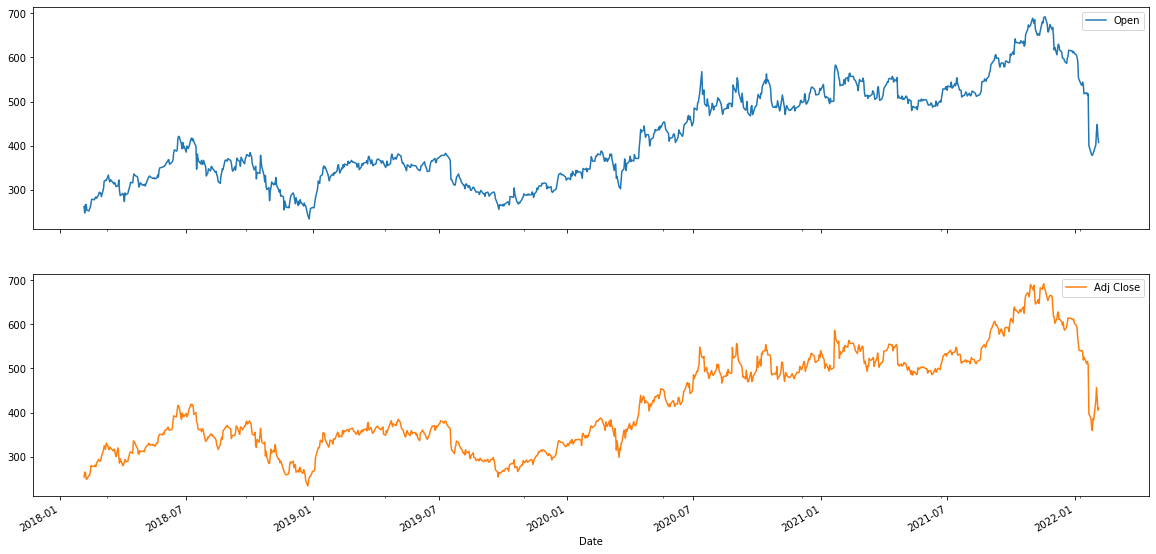

In [10]:
plot_cols = ['Open', 'Adj Close']
plot_features = data[plot_cols]
_ = plot_features.plot(figsize=(20,10), subplots=True)

Creating a dataframe with only 'Adj Close' column since we will be using only this column to predict prices 

In [11]:
sep_data = data.filter(['Adj Close'])
sep_data

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [12]:
# Convert above dataframe to numpy array containing only values

In [13]:
sep_data_array = sep_data.to_numpy()
sep_data_array

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

## Scale the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
min_max_scaled_data = scaler.fit_transform(sep_data_array)

In [16]:
min_max_scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [17]:
t = np.where(min_max_scaled_data==min_max_scaled_data[2])
print(t)

(array([2], dtype=int64), array([0], dtype=int64))


## Splitting the Dataset into Training, Validation and Test Datasets in ratio of (70%,20%,10%)

In [18]:
n = len(sep_data)
train_data_len = int(0.7*n)


In [19]:
train_data = min_max_scaled_data[:train_data_len]
valid_data = min_max_scaled_data[train_data_len:]

In [20]:
train_data.shape

(706, 1)

In [21]:
# Creating x and y training datasets
# i.e. y is the result value and all values in x are variables for training purpose in machine learning

In [22]:
x_train = []
y_train = []
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])

In [23]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [24]:
y_train.shape

(606,)

In [25]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(606, 100, 1)

## Creating the model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import layers

In [27]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [28]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
606/606 [==============================] - 18s 25ms/step - loss: 0.0029
Epoch 2/10
606/606 [==============================] - 16s 26ms/step - loss: 0.0015
Epoch 3/10
606/606 [==============================] - 15s 25ms/step - loss: 0.0012
Epoch 4/10
606/606 [==============================] - 15s 25ms/step - loss: 8.9412e-04
Epoch 5/10
606/606 [==============================] - 15s 24ms/step - loss: 8.5920e-04
Epoch 6/10
606/606 [==============================] - 15s 25ms/step - loss: 9.1467e-04
Epoch 7/10
102/606 [====>.........................] - ETA: 12s - loss: 6.5729e-04

## Validating the model

In [ ]:
x_test = []
y_test = valid_data[:]
for i in range(100,len(valid_data)+100):
    t = np.where(min_max_scaled_data==y_test[i-100])
    x_test.append(min_max_scaled_data[t[0][0]-100:t[0][0], 0])

In [ ]:
type(y_test)

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test.shape

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

In [ ]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
#plot the data
train = sep_data[:train_data_len]
valid = sep_data[train_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price' ,fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='upper center')

In [ ]:
valid

## Predicting the next value

In [ ]:
#get the quote
data = pd.read_excel('1613615-Stock_Price_data_set (1).xlsx', index_col='Date')
#Create new data frame
new_df = data.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price